In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
class stock():
    def __init__(self, stock_name, start_date, end_date):
        self.stock_data = yf.download(stock_name, start=start_date, end=end_date)
        self.stock_name = stock_name
        self.start_date = start_date
        self.end_date = end_date

    def get_data(self):
        return self.stock_data

    def __str__(self):
        return f"Stock Data for {self.stock_name} from {self.start_date} to {self.end_date}"
    
    def show_data(self, head=True):
        if head:
            print(self.stock_data.head())
        else:
            print(self.stock_data)

    def plot_data(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.stock_data['Adj Close'], label='Adjusted Close Price')
        plt.title(f'{self.stock_name} Stock Price')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    
    def adj_close(self):
        adj_close = self.stock_data['Adj Close']
        #adj_close['Adj Close'] = self.stock_name
        return adj_close


In [48]:

stock_list = pd.read_csv('bats_symbols.csv').Name.to_list()
test_list = stock_list[:300]

for i in range(len(test_list)):
    stock_test = stock(test_list[i], '2023-01-01', '2023-12-31')
    if i == 0:
        df = stock_test.adj_close()
    else:
        df = pd.concat([df, stock_test.adj_close()], axis=1)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSTZ']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1672549200, endDate = 1703998800")')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ETHU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1672549200, endDate = 1703998800")')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***

In [49]:
missing = df.isnull().sum() / len(df) 
missing

features_to_drop = missing[missing > 0.3].index
df.drop(columns=features_to_drop, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation for numerical data
imputer = SimpleImputer(strategy='mean')
df = imputer.fit_transform(df)


Ticker
UVIX    0
IEFA    0
UVXY    0
VXX     0
INDA    0
       ..
MSTB    0
DINT    0
HIYS    0
IDUB    0
SNAV    6
Length: 232, dtype: int64

In [50]:
apple = stock('AAPL', '2023-01-01', '2023-12-31')
apple = apple.adj_close()
print(apple)

[*********************100%***********************]  1 of 1 completed

Ticker                           AAPL
Date                                 
2023-01-03 00:00:00+00:00  123.768456
2023-01-04 00:00:00+00:00  125.045036
2023-01-05 00:00:00+00:00  123.718979
2023-01-06 00:00:00+00:00  128.271103
2023-01-09 00:00:00+00:00  128.795563
...                               ...
2023-12-22 00:00:00+00:00  192.656174
2023-12-26 00:00:00+00:00  192.108856
2023-12-27 00:00:00+00:00  192.208359
2023-12-28 00:00:00+00:00  192.636276
2023-12-29 00:00:00+00:00  191.591385

[250 rows x 1 columns]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(df, apple, test_size=0.2, shuffle=False)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)


print(f'Ridge RMSE: {ridge_rmse}')
print(f'Ridge R2: {ridge_r2}')

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

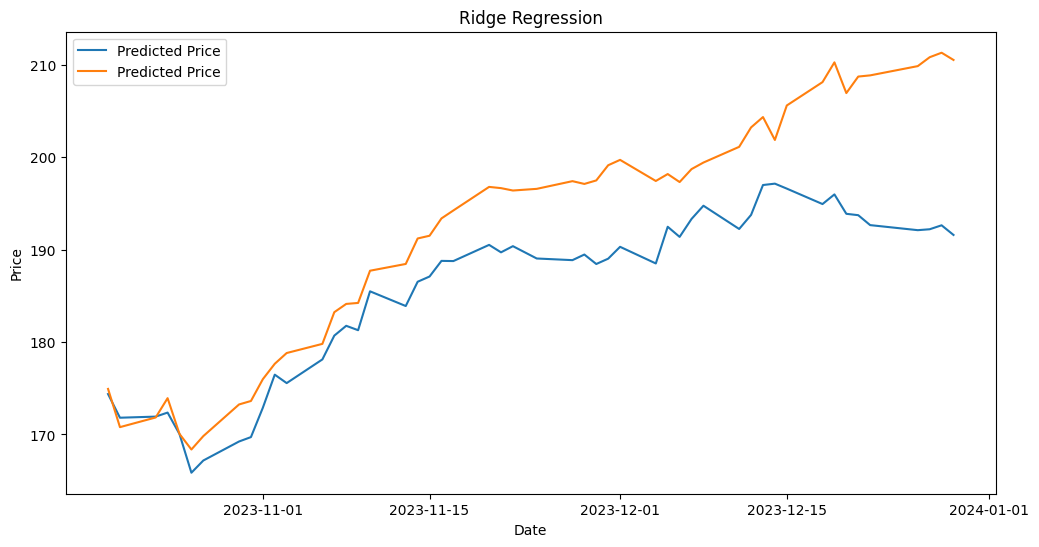

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Predicted Price')
plt.plot(y_test.index, ridge_pred, label='Predicted Price')
plt.title('Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Lasso RMSE: 4.745755328020405
Lasso R2: 0.7237311619216884


/Users/alvin/Documents/Quant-code/my_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.564e+01, tolerance: 5.857e+00
  model = cd_fast.enet_coordinate_descent(


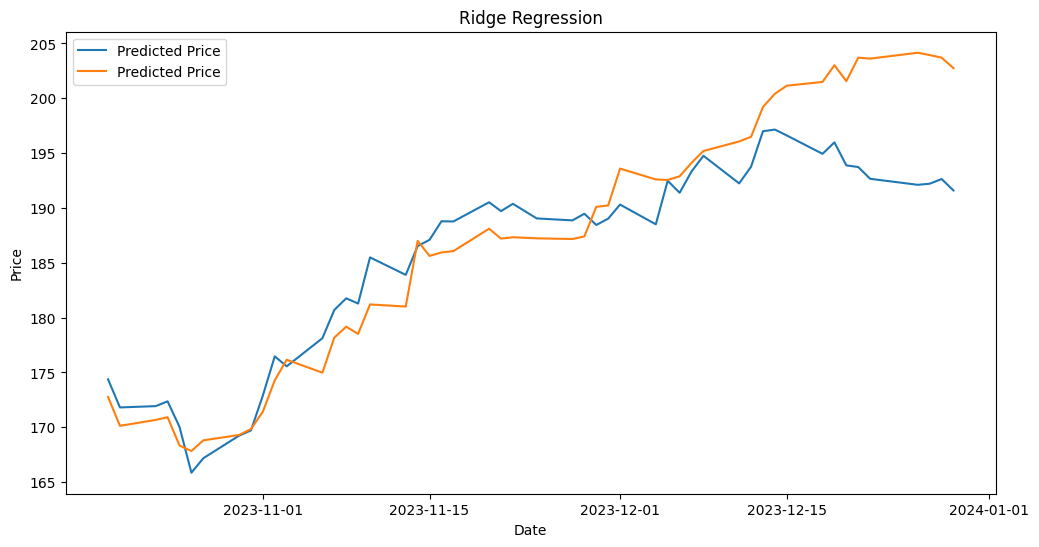

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)


print(f'Lasso RMSE: {lasso_rmse}')
print(f'Lasso R2: {lasso_r2}')

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Predicted Price')
plt.plot(y_test.index, lasso_pred, label='Predicted Price')
plt.title('Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

ElasticNet RMSE: 3.6764439576136496
fElasticNet R2: 0.8342028299423835


/Users/alvin/Documents/Quant-code/my_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.464e+01, tolerance: 5.857e+00
  model = cd_fast.enet_coordinate_descent(


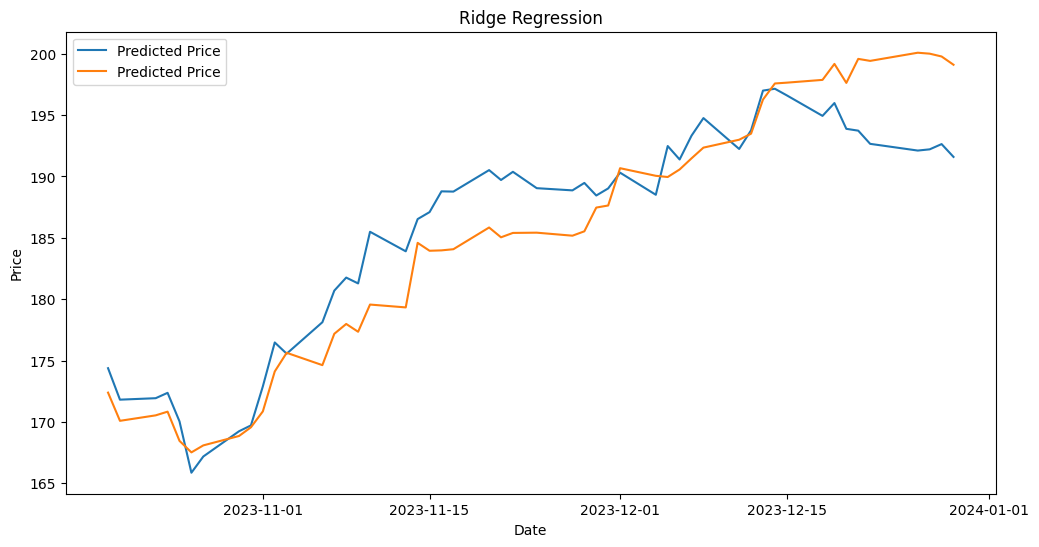

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


e_net =ElasticNet(alpha=1.0)
e_net.fit(X_train, y_train)
e_net_pred = e_net.predict(X_test)
e_net_rmse = np.sqrt(mean_squared_error(y_test, e_net_pred))
e_net_r2 = r2_score(y_test, e_net_pred)


print(f'ElasticNet RMSE: {e_net_rmse}')
print(f'fElasticNet R2: {e_net_r2}')

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Predicted Price')
plt.plot(y_test.index, e_net_pred, label='Predicted Price')
plt.title('Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()